In [3]:
from helpers_image import show, apply_gamma_correction, apply_clahe, img_to_gray
from helpers_config import load_config, save_config
from unet import UNet

import numpy as np

Using TensorFlow backend.
Use token from .telepythrc.


In [4]:
config = load_config()#path="../output/unet/config.json")
#dir_name = datetime.today().strftime("%Y%m%d_%H%M%S")
save_dir = config['dst_path'] + config['model_name'] + "/"

save_dir

'../output/unet_64_4/'

In [7]:
pipeline = UNet(data_dir=config['data_dir'],
                grayscale=config['grayscale'],
                tr_losses=config['tr_losses'],
                val_losses=config['val_losses'],
                patch_size=400,#config['patch_size'],
                stride=208,#config['stride'],
                telepyth_token=config['telepyth_token'])

In [59]:
X_tr, Y, X_te = pipeline.load_data(overlapping_tr=config['overlapping_tr'],
                                   overlapping_te=config['overlapping_te'],
                                   normalized=config['normalized'],
                                   gamma=False,#config['gamma'],
                                   clahe=False,#config['clahe'],
                                   rotations=config['rotations'],
                                   sample_tr_img=config['sample_tr_img'],
                                   sample_te_img=config['sample_te_img'],
                                  force_reload=True)#config['sample_te_img'])

loading data...
train data loaded
test data loaded


In [60]:
X_tr.shape, Y.shape, X_te.shape

((400, 400, 400, 3), (400, 400, 400, 1), (800, 400, 400, 3))

In [61]:
from helpers_image import apply_clahe, apply_gamma_correction

In [95]:
img = np.empty_like(X_tr[0])
for c in range(3):
    img[:, :, c] = apply_gamma_correction(apply_clahe((X_tr[0][:, :, c]*255).astype(np.uint8)))

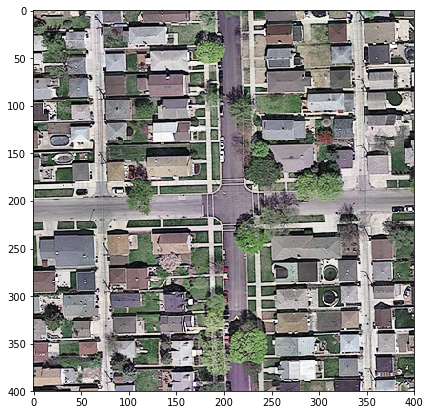

In [96]:
show([img / 255])

In [97]:
import scipy.misc
scipy.misc.imsave('satImage_001_clahe_gamma.jpg', img)

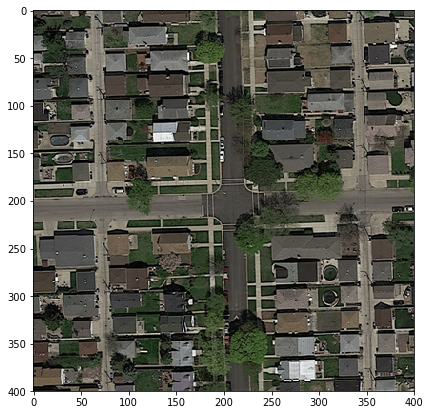

In [69]:
show(X_tr[:1])

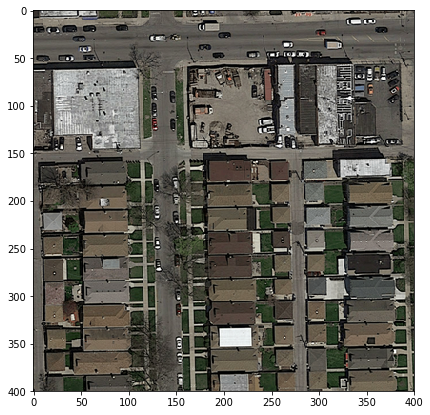

In [14]:
show(X_tr[:1])

In [116]:
import plotly.plotly as py
from plotly.graph_objs import Box
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

init_notebook_mode(connected=True)

import numpy as np

ys = [np.random.randn(50)-1, np.random.randn(50)+1, np.random.randn(50)+1.5]
names = ['name ' + str(i) for i in range(len(ys))]

traces = []
for y, name in zip(ys, names):
    trace = go.Box(
        y=y,
        name=name
    )
    traces.append(trace)

data = traces
iplot(data)